# The baseline model
## Structure

The model looks like this:
![hackathon_model.png](images/hackathon_model.png)

**How do I run this experiment?**

```
# Make sure your PYTHONPATH is set correctly to the root

export PYTHONPATH=/path/to/project:$PYTHONPATH

python3 experiment.py
```

**How do I evaluate the model?**

```
python3 evaluation.py
```


In [2]:
import pandas
import matplotlib.pyplot as plt
import os
root = os.getcwd()

ModuleNotFoundError: No module named 'pandas'

## Training

We trained for 50 epochs and selected the best model according to our validation loss:

In [27]:
training_df = pandas.read_csv(os.path.join(root, "output", "training.log"))
training_df

,epoch,acc,loss,val_acc,val_loss
0,1,0.879859,0.279515,0.886240,0.271192
1,2,0.895741,0.245864,0.890641,0.261411
2,3,0.906493,0.223330,0.892663,0.257240
3,4,0.915000,0.204958,0.895401,0.255898


### Training accuracy

<Figure size 432x288 with 0 Axes>

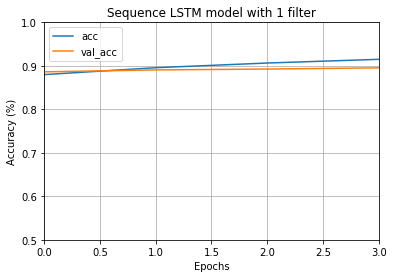

In [28]:
training_acc_columns = [x for x in list(training_df.columns) if "acc" in x]
plt.figure()
training_df[training_acc_columns].plot()
plt.grid(True)
plt.title("Sequence LSTM model with 1 filter")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")

plt.ylim([0.5,1.0])

plt.show()

### Training loss

<Figure size 432x288 with 0 Axes>

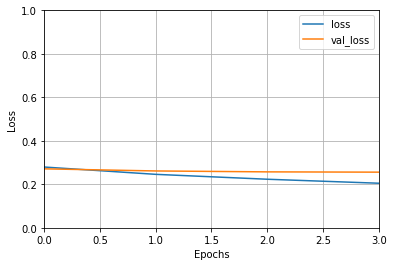

In [29]:
training_loss_columns = [x for x in list(training_df.columns) if "loss" in x]
plt.figure()
training_df[training_loss_columns].plot()
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.ylim([0.0,1.0])

plt.show()

## Evaluation

In [1]:
with open(os.path.join(root, "output", "two.json")) as fp:
    df1 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "five.json")) as fp:
    df2 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "eval.json")) as fp:
    df3 = pandas.read_json(fp).T

NameError: name 'os' is not defined

Each point in the boxplot is the accuracy for one subject

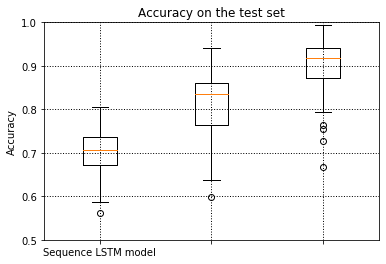

In [58]:
plt.figure()
plt.grid(color='black', linestyle=':', linewidth=1)
plt.boxplot([df1[["acc"]].T.values[0], df2[["acc"]].T.values[0], df3[["acc"]].T.values[0]])
plt.ylim([0.5,1])
plt.ylabel("Accuracy")
plt.title("Accuracy on the test set")
plt.xticks(plt.xticks()[0], ["Sequence LSTM model"])
plt.show()